<a href="https://colab.research.google.com/github/sujitpal/nlp-deeplearning-ai-examples/blob/master/03_02_lm_autocomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Language Model based Text Generation

This notebook is in two parts. In the first part, we experiment with various strategies for text generation from a pre-trained GPT2 HuggingFace Language model, and in the second part, we train the GPT2 model with some custom email from the Enron dataset (so it can become a personal autocomplete similar to how GMail does it).


### Part I: Pre-trained GPT2 model

We experiment with using the GPT2 language model from HuggingFace and experiment with the different text generation modes it supports out of the box, following along with the HuggingFace blog post [How to generate text: using different decoding methods for language generation with transformers](https://huggingface.co/blog/how-to-generate) by Patrick von Platen.


In [1]:
!pip install transformers

     |████████████████████████████████| 1.5MB 9.7MB/s 
     |████████████████████████████████| 890kB 29.5MB/s 
     |████████████████████████████████| 2.9MB 45.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=302e492c515f4235072136f6e324f9ab63e8fb198b138201d370359f217cdba1
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import re
import time

import torch
import transformers

from email.parser import Parser
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, get_linear_schedule_with_warmup

%matplotlib inline

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

In [4]:
input_ids = tokenizer.encode("The ability to generate text sequences", return_tensors="pt")

#### Greedy

In [5]:
%%time
greedy_output = model.generate(input_ids, max_length=50)
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

The ability to generate text sequences is a key feature of the language.

The language is also a very powerful tool for creating and editing text sequences.

The language is also a very powerful tool for creating and editing text sequences. The language
CPU times: user 2.39 s, sys: 23.2 ms, total: 2.42 s
Wall time: 2.52 s


#### Beam Search

In [6]:
%%time
beam_output = model.generate(input_ids, max_length=50, num_beams=5, early_stopping=True)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

The ability to generate text sequences that can be read by the user is a key feature of the browser.

The ability to generate text sequences that can be read by the user is a key feature of the browser. The ability to generate text sequences
CPU times: user 4.65 s, sys: 39.2 ms, total: 4.69 s
Wall time: 4.7 s


In [7]:
%%time
beam2_output = model.generate(input_ids, 
                              max_length=50, 
                              num_beams=5, 
                              no_repeat_ngram_size=2,
                              early_stopping=True)
print(tokenizer.decode(beam2_output[0], skip_special_tokens=True))

The ability to generate text sequences that can be read by the human eye is a key feature of the brain's visual system.

Researchers at the University of California, San Diego, have developed a new way to do this. The researchers used a
CPU times: user 4.65 s, sys: 20.6 ms, total: 4.67 s
Wall time: 4.67 s


In [8]:
%%time
beam3_output = model.generate(input_ids, 
                              max_length=50, 
                              num_beams=5, 
                              no_repeat_ngram_size=2,
                              num_return_sequences=5,
                              early_stopping=True)
print(tokenizer.decode(beam3_output[0], skip_special_tokens=True))

The ability to generate text sequences that can be read by the human eye is a key feature of the brain's visual system.

Researchers at the University of California, San Diego, have developed a new way to do this. The researchers used a
CPU times: user 4.64 s, sys: 26.6 ms, total: 4.66 s
Wall time: 4.67 s


#### Sampling

In [9]:
# Pytorch version of the scikit-learn random_state parameter,
# courtesy: https://github.com/pytorch/pytorch/issues/7068
def seed_torch(seed=0):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
  torch.backends.cudnn.benchmark = False
  torch.backends.cudnn.deterministic = True

seed_torch()

In [10]:
%%time
sample_output = model.generate(input_ids, 
                               do_sample=True,
                               max_length=50, 
                               top_k=0)
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

The ability to generate text sequences without translations into native languages is very important.

The BIND API allows you to generate plain textual sequence sequences from independent Python translator functions. The diagrams below discuss some of these options.

We also have outputs
CPU times: user 2.42 s, sys: 14.7 ms, total: 2.44 s
Wall time: 2.45 s


In [11]:
%%time
sample2_output = model.generate(input_ids, 
                                do_sample=True,
                                max_length=50, 
                                top_k=0,
                                temperature=0.7)
print(tokenizer.decode(sample2_output[0], skip_special_tokens=True))

The ability to generate text sequences that power the tools used are fairly obvious. However, it is important to note that although the text on the map is displayed in the context menu, there is no interactive data viewer at the core of the game. There
CPU times: user 2.46 s, sys: 15.9 ms, total: 2.48 s
Wall time: 2.48 s


In [12]:
%%time
sample3_output = model.generate(input_ids, 
                                do_sample=True,
                                max_length=50, 
                                top_k=50)
print(tokenizer.decode(sample3_output[0], skip_special_tokens=True))

The ability to generate text sequences is important in many different ways, but most people do not have the opportunity to use the tools that are available on desktop.

With this feature you can generate the text as a character or as part of a series
CPU times: user 2.46 s, sys: 14.1 ms, total: 2.48 s
Wall time: 2.48 s


In [13]:
%%time
sample4_output = model.generate(input_ids, 
                                do_sample=True,
                                max_length=50, 
                                top_p=0.92,
                                top_k=0)
print(tokenizer.decode(sample4_output[0], skip_special_tokens=True))

The ability to generate text sequences can be used by CS-3. You can also generate lowercase letters or unicode words (T, L, O, S, V, VE, SP, Y, Z, ZE) using a
CPU times: user 2.7 s, sys: 24.2 ms, total: 2.72 s
Wall time: 2.73 s


In [14]:
%%time
sample5_output = model.generate(input_ids, 
                                do_sample=True,
                                max_length=50, 
                                top_p=0.95,
                                top_k=50,
                                num_return_sequences=3)
print(tokenizer.decode(sample5_output[0], skip_special_tokens=True))

The ability to generate text sequences at a fixed length and the ability to create a set of non-finite sequences to generate sequences at a fixed length has been a central feature of mathematical algorithms that uses finite-state machines. In other words, these
CPU times: user 4.59 s, sys: 57.9 ms, total: 4.64 s
Wall time: 4.65 s


### Part 2: Training GPT2 for Email Autocomplete.

We will use V. Kaminsky's email from the Enron dataset to build a character based language model that we can use for auto-complete. Basic idea is based on this article [Building GMail style smart compose with a char n-gram language model](https://towardsdatascience.com/gmail-style-smart-compose-using-char-n-gram-language-models-a73c09550447).

**REFERENCES**
* [Fine tuning GPT2 for text generation using Pytorch](https://towardsdatascience.com/fine-tuning-gpt2-for-text-generation-using-pytorch-2ee61a4f1ba7) by Raymond Cheng -- describes changes to tokenizer (adding special tokens) and running script provided by Huggingface transformers project to fine-tune. So this would just involve formatting the data input. Unfortunately, this requires changes to tokenizer and the script itself is legacy now.
* [Easy GPT2 fine-tuning with HuggingFace and Pytorch](https://reyfarhan.com/posts/easy-gpt2-finetuning-huggingface/) by Ray Farhan, which has an attached Collab notebook, from which this code was largely adapted.

#### Download data

In [15]:
%%bash
(
    if [ -d maildir/kaminski-v/inbox/ ]; then
      echo "ENRON emails already downloaded"
    else
      wget -nc https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz
      tar -xf enron_mail_20150507.tar.gz
      rm enron_mail_20150507.tar.gz
    fi
)

--2021-01-03 20:12:32--  https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443254787 (423M) [application/x-gzip]
Saving to: ‘enron_mail_20150507.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  272K 26m29s
    50K .......... .......... .......... .......... ..........  0%  486K 20m40s
   100K .......... .......... .......... .......... ..........  0%  445K 19m11s
   150K .......... .......... .......... .......... ..........  0%  486K 18m5s
   200K .......... .......... .......... .......... ..........  0%  697K 16m32s
   250K .......... .......... .......... .......... ..........  0% 1.20M 14m46s
   300K .......... .......... .......... .......... ..........  0% 1.56M 13m18s
   350K .......... .......... .......... .......... ..........  0%  698K 12m55s
   400K .

In [16]:
!ls maildir/kaminski-v/_sent_mail/

1.     1285.  1569.  1854.  2138.  2422.  390.	 4198.	4487.  4776.  715.
10.    1286.  157.   1855.  2139.  2423.  3904.  4199.	4488.  4777.  716.
100.   1287.  1570.  1856.  214.   2424.  3909.  42.	4489.  4778.  717.
1000.  1288.  1571.  1857.  2140.  2425.  391.	 420.	449.   4779.  718.
1001.  1289.  1572.  1858.  2141.  2426.  3910.  4200.	4490.  478.   719.
1002.  129.   1573.  1859.  2143.  2427.  3911.  4201.	4491.  4780.  72.
1003.  1290.  1574.  186.   2144.  2428.  3912.  4202.	4492.  4781.  720.
1004.  1291.  1575.  1860.  2145.  2429.  3913.  4203.	4493.  4782.  721.
1005.  1292.  1576.  1861.  2146.  243.   3914.  4204.	4494.  4783.  722.
1006.  1293.  1577.  1862.  2147.  2430.  3915.  4205.	4495.  4784.  723.
1007.  1294.  1578.  1863.  2148.  2431.  3916.  4206.	4496.  4785.  724.
1008.  1295.  1579.  1864.  2149.  2432.  3917.  4207.	4497.  4786.  725.
1009.  1296.  158.   1865.  215.   2433.  3918.  4208.	4498.  4787.  726.
101.   1297.  1580.  1866.  2150.  2434.  39

#### Preprocess Data

In [17]:
def extract_email_body(email_file):
    with open(email_file, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
    email_body = []
    for line in email.get_payload().split("\n"):
      if len(line) <= 20:
        continue
      if line.startswith("----") or line.startswith("****"):
        continue
      if line.startswith("To:") or line.startswith("From:"):
        # for top posting, this is thread text from other people's mail
        break
      email_body.append(line)
    if len(email_body) == 0:
      return None
    else:
      return " ".join(email_body)


email_bodies = []
demo_mailbox = "maildir/kaminski-v/_sent_mail"
for message in os.listdir(demo_mailbox):
  email_body = extract_email_body(os.path.join(demo_mailbox, message))
  if email_body is not None:
    email_bodies.append(email_body)

len(email_bodies)

3259

In [18]:
for i in np.random.choice(np.arange(len(email_bodies)), size=5, replace=False):
  print(i, ":", email_bodies[i])

2331 : Congratulations. Well deserved.
1512 : 01:24 PM --------------------------- Pinnamaneni Krishnarao
2762 : 04:13 PM --------------------------- GemanIX@aol.com on 09/01/2000 03:49:56 PM
2578 : What about Thursday, 10:30 a.m.? I have just come back from Europe last night and I am trying to organize my schedule for the next few days. My phone number is 713 853 3848. "John D. Martin" <J_Martin@baylor.edu> on 09/22/2000 01:57:47 PM
1994 : 04:46 PM ---------------------------


#### Split into training and test

For testing (manually), we just pick 5 emails, we will use the rest to fine-tune the GPT2 model.

In [19]:
test_ids = set(list(np.random.choice(np.arange(len(email_bodies)), size=5, replace=False)))
sents_train, sents_test = [], []
for i in np.arange(len(email_bodies)):
  if i in test_ids:
    sents_test.append(email_bodies[i])
  else:
    sents_train.append(email_bodies[i])

len(sents_train), len(sents_test)

(3254, 5)

#### Add special tokens to tokenizer

In [20]:
special_tokens_dict = {
    "pad_token": "<PAD>"
}
num_added_toks = tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(50258, 768)

#### Dataset

In [21]:
class EmailBodiesDataset(Dataset):
  def __init__(self, sents, tokenizer, max_length=768):
    super().__init__()
    self.sents = sents
    self.tokenizer = tokenizer
    self.max_length = max_length

  def __len__(self):
    return len(self.sents)

  def __getitem__(self, i):
    encoding = tokenizer(" ".join([tokenizer.bos_token,
                                   self.sents[i],
                                   tokenizer.eos_token]),
                         truncation=True,
                         max_length=self.max_length,
                         padding="max_length",
                         return_tensors="pt")
    return encoding.input_ids, encoding.attention_mask


train_ds = EmailBodiesDataset(sents_train, tokenizer)
test_ds = EmailBodiesDataset(sents_test, tokenizer)

# self-test
assert(len(train_ds[12]) == 2)
train_ds[12][0].size(), train_ds[12][1].size()

(torch.Size([1, 768]), torch.Size([1, 768]))

In [22]:
BATCH_SIZE = 4

train_dl = DataLoader(train_ds, shuffle=True, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, shuffle=False, batch_size=1)

#### Fine-tune model with email texts

In [23]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(dev)

In [24]:
NUM_EPOCHS = 5
# NUM_EPOCHS = 1
WARMUP_STEPS = 1e2

LEARNING_RATE = 5e-4
EPSILON = 1e-8

In [25]:
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, eps=EPSILON)

total_steps = len(train_dl) * NUM_EPOCHS

# Create the learning rate scheduler.
# This changes the learning rate as the training loop progresses
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=WARMUP_STEPS, 
                                            num_training_steps=total_steps)

In [26]:
losses = []
for epoch in range(1, NUM_EPOCHS + 1):
  model.train()
  train_loss = 0
  start = time.time()
  for step, batch in enumerate(train_dl):
    b_input_ids, b_attn_masks = batch
    b_input_ids, b_attn_masks = b_input_ids.to(dev), b_attn_masks.to(dev)

    outputs = model(b_input_ids,
                    labels=b_input_ids, 
                    attention_mask=b_attn_masks,
                    token_type_ids=None)
    loss = outputs[0]
    batch_loss = loss.item()
    train_loss += batch_loss

    if step % 100 == 0:
      model.eval()
      elapsed = time.time() - start
      print("Epoch {:d}, Batch {:d} of {:d}, loss: {:.3f}, elapsed: {:.0f}s".format(
          epoch, step, len(train_dl), batch_loss, elapsed))
      losses.append(batch_loss)
      model.eval()
      # extract a random sentence from training set and provide first 5 tokens
      # as prompt to model.generate()
      eval_id = np.random.randint(0, high=len(sents_train))
      eval_body = " ".join(sents_train[eval_id].split()[0:5])
      input_ids = tokenizer.encode(eval_body, return_tensors="pt").to(dev)
      sample_output = model.generate(input_ids, 
                                     do_sample=True,
                                     max_length=50, 
                                     top_p=0.95,
                                     top_k=50,
                                     num_return_sequences=3)
      print("   prompt> {:s}".format(eval_body))
      print("generated> {:s}".format(tokenizer.decode(sample_output[0], skip_special_tokens=True)))
      model.train()

    loss.backward()
    optimizer.step()
    scheduler.step()

    model.zero_grad()



Epoch 1, Batch 0 of 814, loss: 12.819, elapsed: 1s
   prompt> Lunch with Kristin is scheduled
generated> Lunch with Kristin is scheduled
Epoch 1, Batch 100 of 814, loss: 0.246, elapsed: 104s
   prompt> Yes. I have additional info
generated> Yes. I have additional info on this meeting --------------------------- ---------------------------  ---------------------------   ---------------------------  ---------------------------   
Epoch 1, Batch 200 of 814, loss: 0.201, elapsed: 216s
   prompt> Managing Director, Enterprise Risk 8400
generated> Managing Director, Enterprise Risk 8400.00 Corp. - Corporate Risk Analyst 11/13/2001 10:01:05 AM - --------------------------- 	@ENRON.com on 12/01/2001 01:29:08 PM
Epoch 1, Batch 300 of 814, loss: 0.111, elapsed: 332s
   prompt> 12:21 PM --------------------------- FAP <FAP@management.wharton.upenn.edu>
generated> 12:21 PM --------------------------- FAP <FAP@management.wharton.upenn.edu> on 04/11/2000 06:41:50 AM Please respond to FAP@management.

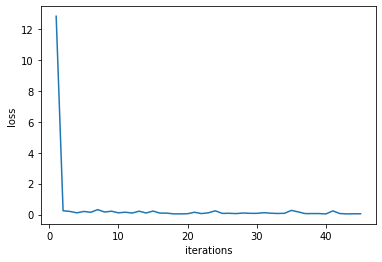

In [27]:
plt.plot(np.arange(len(losses)) + 1, losses)
plt.xlabel("iterations")
plt.ylabel("loss")
_ = plt.show()

#### Predict using fine-tuned model

In [28]:
for i, text in enumerate(sents_test):
  print("--- {:d} ---".format(i + 1))
  print("original text: {:s}".format(text))
  prompt = " ".join(text.split()[0:5])
  print("       prompt: {:s}".format(prompt))
  input_ids = tokenizer.encode(prompt, return_tensors="pt").to(dev)
  
  # output = model.generate(input_ids, max_length=50)
  output = model.generate(input_ids,
                          do_sample=True,
                          max_length=50,
                          top_p=0.95,
                          top_k=50,
                          num_return_sequences=3)
  print("    generated: {:s}".format(
      tokenizer.decode(output[0], skip_special_tokens=True)))


--- 1 ---
original text: I am forwarding your resume to our Analyst/Associate program. I talked to them about my needs for the summer and I don't see any problem. They should contact you shortly. Datren Williams <dwill25@bellsouth.net> on 02/05/2000 03:46:43 PM
       prompt: I am forwarding your resume
    generated: I am forwarding your resume to me. Please, let me know when I come back. 
--- 2 ---
original text: Phone: Joel 011 44 207 484 9885
       prompt: Phone: Joel 011 44 207
    generated: Phone: Joel 011 44 207 7167 5115                                       
--- 3 ---
original text: 6:30 on Saturday  is fine. Anthony_Mends@enron.net on 04/19/2000 05:26:28 PM
       prompt: 6:30 on Saturday is fine.
    generated: 6:30 on Saturday is fine. Please, let Shirley know how  Merry Christmas (or Stinson, myself) went. Happy New Year. 
--- 4 ---
original text: Sorry to have missed the dinner. I had to work on Sunday to prepare for my trip to London this week. I called Jeff about it a